# Modelamiento de la resistencia del concreto de alto desempeño, usando redes neuronales articiales


In [ ]:
!pip install keras
!pip install graphviz
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=da5824a26c6517dae390e5e340716144ee1c7c01ee0df99ee3477533aaf2e4e0
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
import ann_visualizer
import graphviz
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargue del dataset
df = pd.read_csv(r'/content/drive/My Drive/Concrete_Data_Yeh.csv')
#print(df.info())
print(df.head())

   cement   slag  flyash  water  ...  coarseaggregate  fineaggregate  age  csMPa
0   540.0    0.0     0.0  162.0  ...           1040.0          676.0   28  79.99
1   540.0    0.0     0.0  162.0  ...           1055.0          676.0   28  61.89
2   332.5  142.5     0.0  228.0  ...            932.0          594.0  270  40.27
3   332.5  142.5     0.0  228.0  ...            932.0          594.0  365  41.05
4   198.6  132.4     0.0  192.0  ...            978.4          825.5  360  44.30

[5 rows x 9 columns]


In [ ]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
x_org = df.drop('csMPa',axis=1).values
y_org = df['csMPa'].values

In [ ]:
## Mapas de correlación

corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')
plt.title("Correlation Between Variables")
plt.savefig('1.png')

In [ ]:
# División del dataset en entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.4) #poner el valor de rapidminer

# Escalamiento de variables

# Z-SCORE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MIN-MAX
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [ ]:
# Definición de la Red Neuronal para regresión

from keras.models import Sequential
from keras.layers import Dense
from keras import backend

In [ ]:
# Definición del Error Cuadrado Medio como la función métrica

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
# Construcción del primer modelo: una capa oculta con 5 nodos

model1 = Sequential()

# Capa de entrada y Capa oculta - con neurona de sesgo
model1.add(Dense(50,input_dim=8, use_bias=True, activation = 'relu'))

# Capa de salida
model1.add(Dense(1, use_bias=True, activation='linear'))

In [ ]:
# Visualización de la red neuronal

from ann_visualizer.visualize import ann_viz;
ann_viz(model1,  title="Red Neuronal para estimar resistencia del concreto")

In [ ]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed
#from tensorflow.python.keras.optimizers import Adam

seed(1)
opt= keras.optimizers.adam_v2.Adam(lr=0.015)

model1.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model1.fit(X_train,y_train,epochs = 100, batch_size=32,validation_split=0.1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 1397.5538 - rmse: 33.3961 - val_loss: 1130.1055 - val_rmse: 29.8800
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 794.0135 - rmse: 23.9621 - val_loss: 441.9006 - val_rmse: 17.1748
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 256.8001 - rmse: 12.5678 - val_loss: 159.3462 - val_rmse: 10.6527
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 177.4784 - rmse: 10.5363 - val_loss: 146.7750 - val_rmse: 10.0103
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 144.8299 - rmse: 9.8417 - val_loss: 130.4538 - val_rmse: 9.3058
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 133.7934 - rmse: 9.3438 - val_loss: 121.8180 - val_rmse: 9.0652
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 125.3911 - rmse: 9.1544 - val_loss: 120.2007 - val_rmse: 9.0120
Epoch 8/100
18/18 [============

In [ ]:
print(model1.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model1.predict(X_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.9347550304678884
coeficiente de correlación:  0.966827301263203
MSE:  18.75353287478769


In [ ]:
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8606214806587608
coeficiente de correlación:  0.9276968689495296
MSE:  37.02732138355416


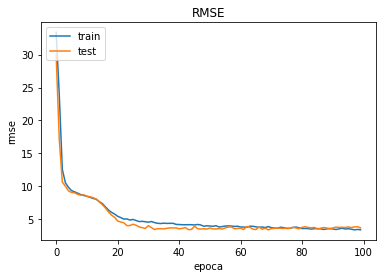

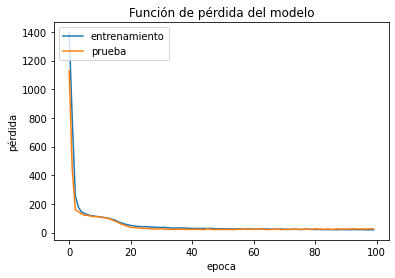

In [ ]:
# Gráfico de la función de pérdida y el RMSE para datasets de entrenamiento y prueba
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('RMSE')
plt.ylabel('rmse')
plt.xlabel('epoca')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Resumen de la historia para la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('pérdida')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [ ]:
# Construcción de un segundo modelo: dos capas ocultas con 5 nodos

model2=Sequential()

# Capa de entrada y Primera capa oculta - con neurona de sesgo
model2.add(Dense(5, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Segunda capa oculta - con neurona de sesgo
model2.add(Dense(5, use_bias=True, activation='sigmoid'))

# Capa de salida
model2.add(Dense(1,activation='linear'))

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model2, title="Red Neuronal para estimar resistencia del concreto")

In [ ]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.adam_v2.Adam(lr=0.015)

model2.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model2.fit(X_train,y_train,epochs = 300 ,batch_size=32,validation_split=0.1)

print(model2.summary())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
18/18 [==============================] - 1s 9ms/step - loss: 1485.6144 - rmse: 34.5956 - val_loss: 1409.6274 - val_rmse: 33.7520
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 1368.6937 - rmse: 32.8437 - val_loss: 1285.2412 - val_rmse: 31.8544
Epoch 3/300
18/18 [==============================] - 0s 2ms/step - loss: 1245.0947 - rmse: 30.9386 - val_loss: 1169.5149 - val_rmse: 30.0136
Epoch 4/300
18/18 [==============================] - 0s 2ms/step - loss: 1138.5266 - rmse: 29.1868 - val_loss: 1073.2202 - val_rmse: 28.4150
Epoch 5/300
18/18 [==============================] - 0s 2ms/step - loss: 1049.3602 - rmse: 27.6440 - val_loss: 989.4719 - val_rmse: 26.9712
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 968.9349 - rmse: 26.2193 - val_loss: 912.1801 - val_rmse: 25.5919
Epoch 7/300
18/18 [==============================] - 0s 2ms/step - loss: 889.5646 - rmse: 24.7918 - val_loss: 830.1431 - val_rmse: 24.0839
Epoch 8/300
18/18 

In [ ]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model2.predict(X_train)
y_predict = model2.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.8705777640862307
coeficiente de correlación:  0.9330475679654444
MSE:  37.200173030088465

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8073429349251822
coeficiente de correlación:  0.8985226401850885
MSE:  51.18130899261825


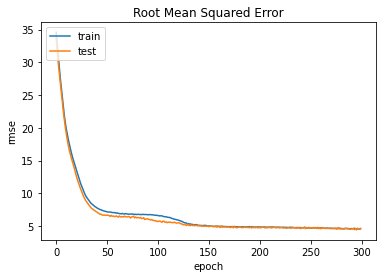

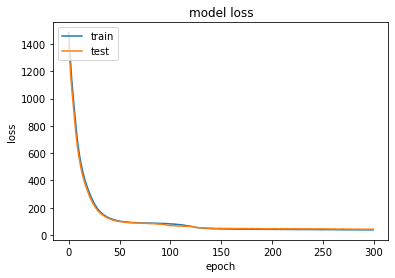

In [ ]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [ ]:
# Construcción de un tercer modelo: tres capas ocultas con 5 nodos

model3 = Sequential()

# Capa de entrada y Primera capa oculta - con neurona de sesgo
model3.add(Dense(5, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Segunda capa oculta - con neurona de sesgo
model3.add(Dense(5, use_bias=True, activation='sigmoid'))

# Tercera capa oculta - con neurona de sesgo
model3.add(Dense(5, use_bias=True, activation='sigmoid'))

# Capa de salida
model3.add(Dense(1,activation='linear'))

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model3, title="Red Neuronal para estimar resistencia del concreto")

In [ ]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1992)
opt =keras.optimizers.adam_v2.Adam(lr=0.005)

model3.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model3.fit(X_train,y_train,epochs = 500 ,batch_size=10,validation_split=0.1)

print(model3.summary())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
56/56 [==============================] - 1s 12ms/step - loss: 1474.5852 - rmse: 34.4267 - val_loss: 1400.9214 - val_rmse: 33.6124
Epoch 2/500
56/56 [==============================] - 0s 2ms/step - loss: 1350.0715 - rmse: 32.5740 - val_loss: 1268.7109 - val_rmse: 31.5862
Epoch 3/500
56/56 [==============================] - 0s 2ms/step - loss: 1226.2113 - rmse: 30.6251 - val_loss: 1158.0339 - val_rmse: 29.8170
Epoch 4/500
56/56 [==============================] - 0s 2ms/step - loss: 1128.1959 - rmse: 28.9813 - val_loss: 1068.7659 - val_rmse: 28.3279
Epoch 5/500
56/56 [==============================] - 0s 2ms/step - loss: 1044.8605 - rmse: 27.5775 - val_loss: 992.4109 - val_rmse: 27.0167
Epoch 6/500
56/56 [==============================] - 0s 2ms/step - loss: 971.3576 - rmse: 26.2620 - val_loss: 920.8693 - val_rmse: 25.7419
Epoch 7/500
56/56 [==============================] - 0s 2ms/step - loss: 904.2854 - rmse: 25.0321 - val_loss: 857.6405 - val_rmse: 24.5930
Epoch 8/500
56/56

In [ ]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model3.predict(X_train)
y_predict = model3.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.8766768799564855
coeficiente de correlación:  0.9363102477045124
MSE:  35.447088144001306

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8082244157504838
coeficiente de correlación:  0.8990130231261857
MSE:  50.94713464519265


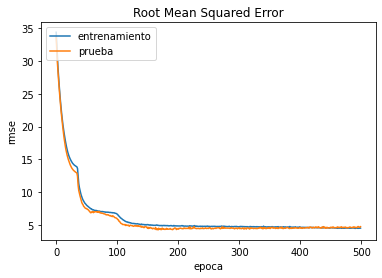

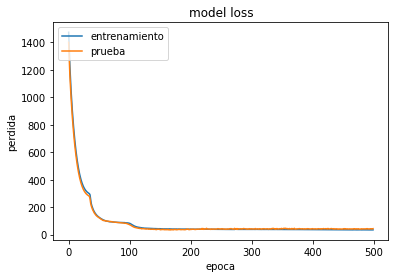

In [ ]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('perdida')
plt.xlabel('epoca')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [ ]:
# Construcción del cuarto modelo: una capa oculta con 8 nodos

model4 = Sequential()

# Capa de entrada y Capa oculta - con neurona de sesgo
model4.add(Dense(8, input_dim=8, use_bias=True, activation = 'sigmoid'))

# Capa de salida
model4.add(Dense(1,activation='linear'))

In [ ]:
# Visualización de la red neuronal

from ann_visualizer.visualize import ann_viz;
ann_viz(model4,  title="Red Neuronal para estimar resistencia del concreto")

In [ ]:
# Optimizar , Compilar y Entrenar el Modelo
from numpy.random import seed

seed(1)
opt =keras.optimizers.adam_v2.Adam(lr=0.015)

model1.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model1.fit(X_train,y_train,epochs = 500, batch_size=32,validation_split=0.1)

print(model1.summary())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
18/18 [==============================] - 1s 9ms/step - loss: 22.2995 - rmse: 3.6812 - val_loss: 26.4090 - val_rmse: 3.8536
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 19.6990 - rmse: 3.4223 - val_loss: 27.8205 - val_rmse: 4.0411
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 18.5060 - rmse: 3.3305 - val_loss: 30.8965 - val_rmse: 3.8487
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 21.0000 - rmse: 3.5430 - val_loss: 25.1960 - val_rmse: 3.8499
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 19.0171 - rmse: 3.4061 - val_loss: 26.2592 - val_rmse: 3.7640
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 18.2976 - rmse: 3.3371 - val_loss: 25.2760 - val_rmse: 3.7940
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 19.5879 - rmse: 3.4039 - val_loss: 27.8353 - val_rmse: 3.7457
Epoch 8/500
18/18 [==============================] - 0s

In [ ]:
# Predicción y cálculo de los coeficientes de determinación y correlación

y_predict_e = model1.predict(X_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2e = r2_score(y_train,y_predict_e)
R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN ENTRENAMIENTO")
print("coeficiente de determinación: ", R2e)
print("coeficiente de correlación: ", math.sqrt(R2e))
print("MSE: ", mean_squared_error(y_train,y_predict_e))

R2 = r2_score(y_test,y_predict)
print("\nDESEMPEÑO EN PRUEBA")
print("coeficiente de determinación: ", R2)
print("coeficiente de correlación: ", math.sqrt(R2))
print("MSE: ", mean_squared_error(y_test,y_predict))


DESEMPEÑO EN ENTRENAMIENTO
coeficiente de determinación:  0.9548418541809277
coeficiente de correlación:  0.9771600964943911
MSE:  12.979924402687042

DESEMPEÑO EN PRUEBA
coeficiente de determinación:  0.8559755960764879
coeficiente de correlación:  0.9251894919833925
MSE:  38.26154787951477


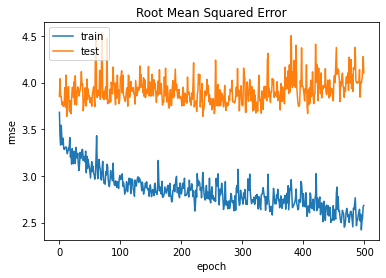

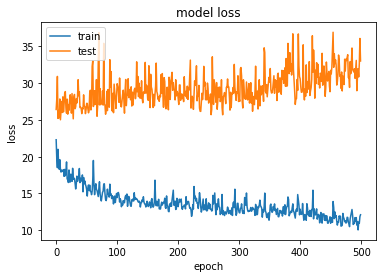

In [ ]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()